In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Phase_Retrieval/classification_over_measurements/utils")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%tensorflow_version 2.x
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Layer
import tensorflow_datasets as tfds
from LoadData import *
from AcquisitionLayer import Muestreo
from CallBacks import *
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from loss_and_metrics import *
from scipy.io import savemat, loadmat
import seaborn as sns
from scipy import misc
import cv2
from FinalModel import CLASSIFICATION_MODEL,CLASSIFICATION_MODEL_with_back,CLASSIFICATION_MODEL_with_initialization


In [33]:
SHAPE = (128,128)
BATCH_SIZE = 16
NUM_MEASUREMENTS = 1
NUM_CLASSES = 10
results_folder = os.path.join("..", "results", "fashion_mnist", "None")
#medidas_path = os.path.join("..", "mnist_medidas", "mnist_medidas", "mnist_medida_")
#medidas_path = os.path.join("..", "captura medidas fashion laboratorio", "medidas_capturadas_mnist", "mnist_capturada_")
medidas_path = os.path.join("..", "captura medidas fashion laboratorio", "medidas_capturadas_fashion", "fashion_clase_")
#mascara_path = os.path.join("..", "mnist_medidas", "mnist_medidas", "mascara_usada_mnist_")


In [34]:
medidas = np.zeros((10,350,250,1))
cont = 0
for i in range(10):
  load_path = medidas_path+str(i)+".bmp"
  if not os.path.exists(load_path):
    print("No existe", load_path)
  a = cv2.imread(load_path)
  if i==5:
    a = a[1150:1500,1500:1750,0:1]
  else:
    #a = a[1200:1550,1400:1650,0:1]
    a = a[1150:1500,1500:1750,0:1]
  min_a = np.min(a)
  max_a = np.max(a)
  medidas[cont,...] = (a-min_a)/(max_a-min_a)

  cont+=1

In [35]:
medidas = tf.image.resize(medidas, size=SHAPE)

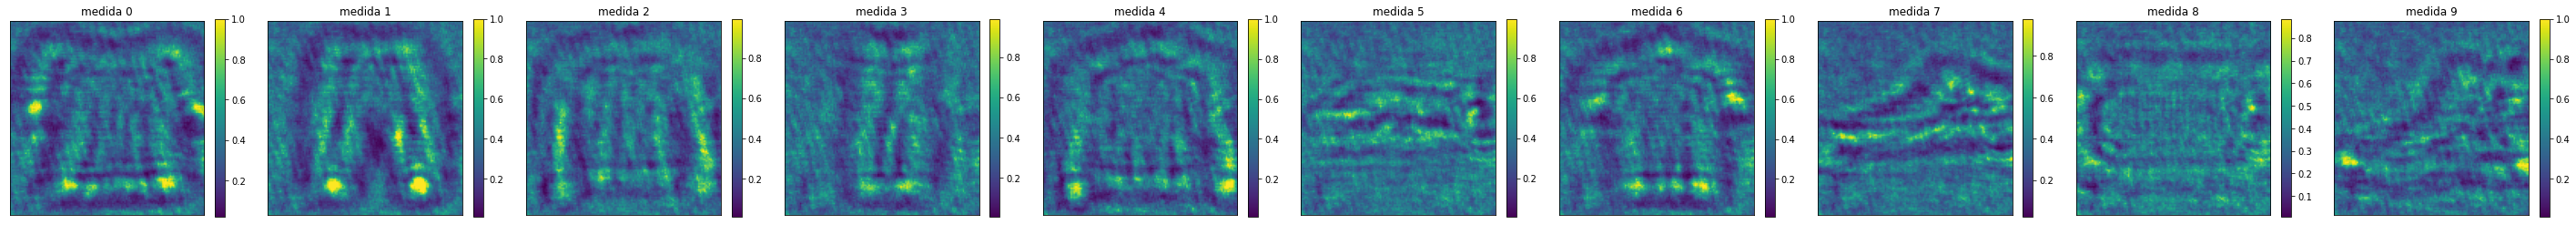

In [36]:
fig, axs = plt.subplots(1, 10,figsize=(50,5))
for i in range(10):
  a = axs[i].imshow(medidas[i,...,0]); plt.sca(axs[i]); plt.yticks([]); plt.xticks([])
  fig.colorbar(a, ax=axs[i],fraction=0.046)
  axs[i].set_title("medida " + str(i))
fig.show()

In [40]:
#modelo_final = CLASSIFICATION_MODEL_with_back(shape=SHAPE, num_clases=NUM_CLASSES, L = NUM_MEASUREMENTS)
modelo_final = CLASSIFICATION_MODEL(shape=SHAPE, num_clases=NUM_CLASSES, L = NUM_MEASUREMENTS)
modelo_final.build((BATCH_SIZE, *SHAPE, 2))


modelo_final.load_weights(os.path.join(results_folder, "last_weights.h5"))
modelo_final = tf.keras.Model(inputs = modelo_final.layers[1], outputs = modelo_final.layers[2])

ValueError: ignored

In [ ]:
salida = modelo_final(medidas)
confianza = tf.math.reduce_max(salida, axis=1).numpy()
clases_pred = tf.math.argmax(salida, axis=0).numpy()
clases_correctas = np.arange(10)
print(clases_pred)
np.sum(clases_correctas == clases_pred)/10

NameError: ignored

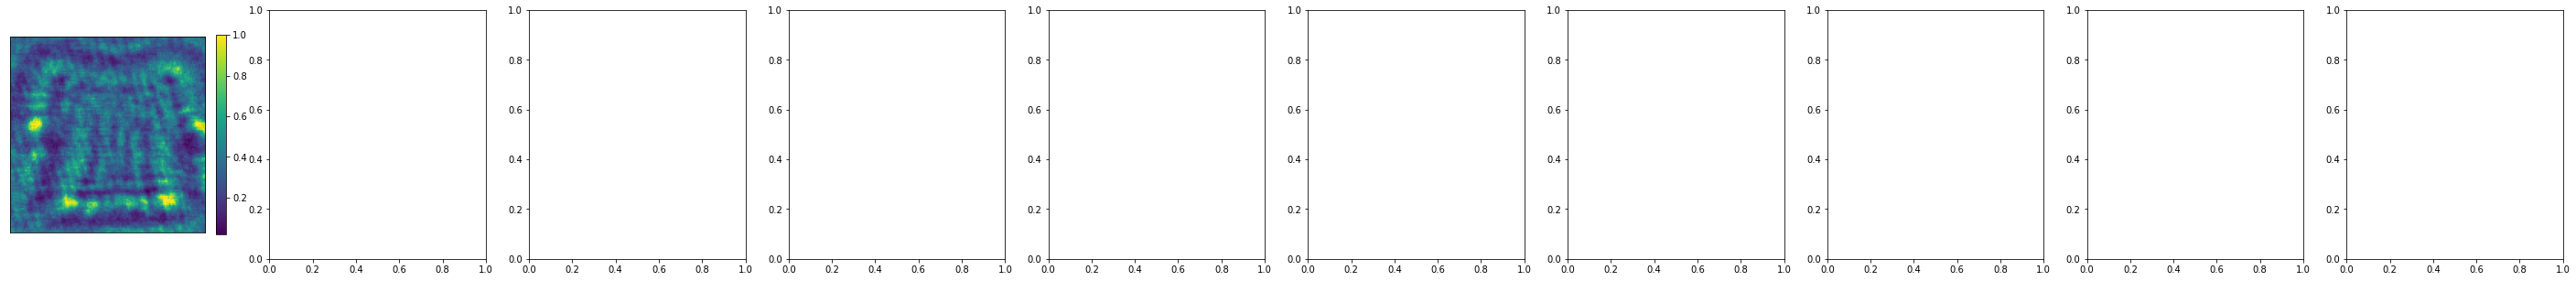

In [19]:
fig, axs = plt.subplots(1, 10,figsize=(50,5))
for i in range(10):
  a = axs[i].imshow(medidas[i,...,0]); plt.sca(axs[i]); plt.yticks([]); plt.xticks([])
  fig.colorbar(a, ax=axs[i],fraction=0.046)
  axs[i].set_title("Clase predicha: " + str(clases_pred[i]))
fig.show()
fig.savefig(os.path.join(results_folder, "resultados_clasificacion_lab.svg"))